# Mobile Bay Surveys - For NOAA RESTORE

Summary of the work described in the notebok, and how it fits into the NOAA RESTORE project.

Author:
- Nick LaBon
- affiliations

In [1]:
# load libraries, suppress warnings
suppressPackageStartupMessages({
library(ggplot2)
library(leaflet)
library(dplyr)
library(lubridate)
})

## Station Data

Read station coordinates

Upload a small CSV file that contains, at minimum, 
- `Station`
- `Lat`
- `Lon`

Or just use ours.

In [2]:
# Read a CSV file that has 'Station', 'Lat', 'Lon'
#load station locations
df <- read.csv("stations/mb_stations.csv")

## Map of our Study Area
Define the bounding box for your study area

In [5]:
## Define bounding box
latmin = 30.10
latmax = 31.96
lonmin = -89.75
lonmax = -87.4

In [6]:
# Mobile Bay
leaflet(df) %>%
      addTiles() %>%
      setView(lng = -87.98733, lat = 30.50355, zoom = 9) %>%
      addRectangles(
        lng1=lonmin, lat1=latmin,
        lng2=lonmax, lat2=latmax,
        fillColor = "transparent") %>%
        addCircles(lng = ~Lon, lat = ~Lat, weight = 5,
                radius = 500, popup = ~Station)


HTML widgets cannot be represented in plain text (need html)

## Download and plot station data 

Later, we'll *download* these from databases, but for the demo, we put a small, sample demo file in GitHub.

(For the bigger analysis, we avoid putting data in GitHub...too big and not what git is meant for.)

In [7]:
#Read profile data
df <- read.csv('data/MB6H.csv')
#Clean up the date
df$Date <- as.Date(df$Date)
#Take a look
head(df)

,Date,Tsurf,Tbot,Ssurf,Sbot
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-01-01,19.31146,19.75310,1.015475021,3.760553598
2,2019-01-02,19.61384,19.36859,0.057059967,0.574621789
3,2019-01-03,19.51646,19.47972,0.015781577,0.015732953
4,2019-01-04,18.92273,18.94596,0.022654519,0.022923424
5,2019-01-05,15.88872,15.91463,0.006816504,0.007029013
6,2019-01-06,15.17436,15.18223,0.008215939,0.008241896


### The following plots model data of temperature and salinity at sea surface and bottom.

In [8]:
#General plot options
options(repr.plot.width=15, repr.plot.height=6)

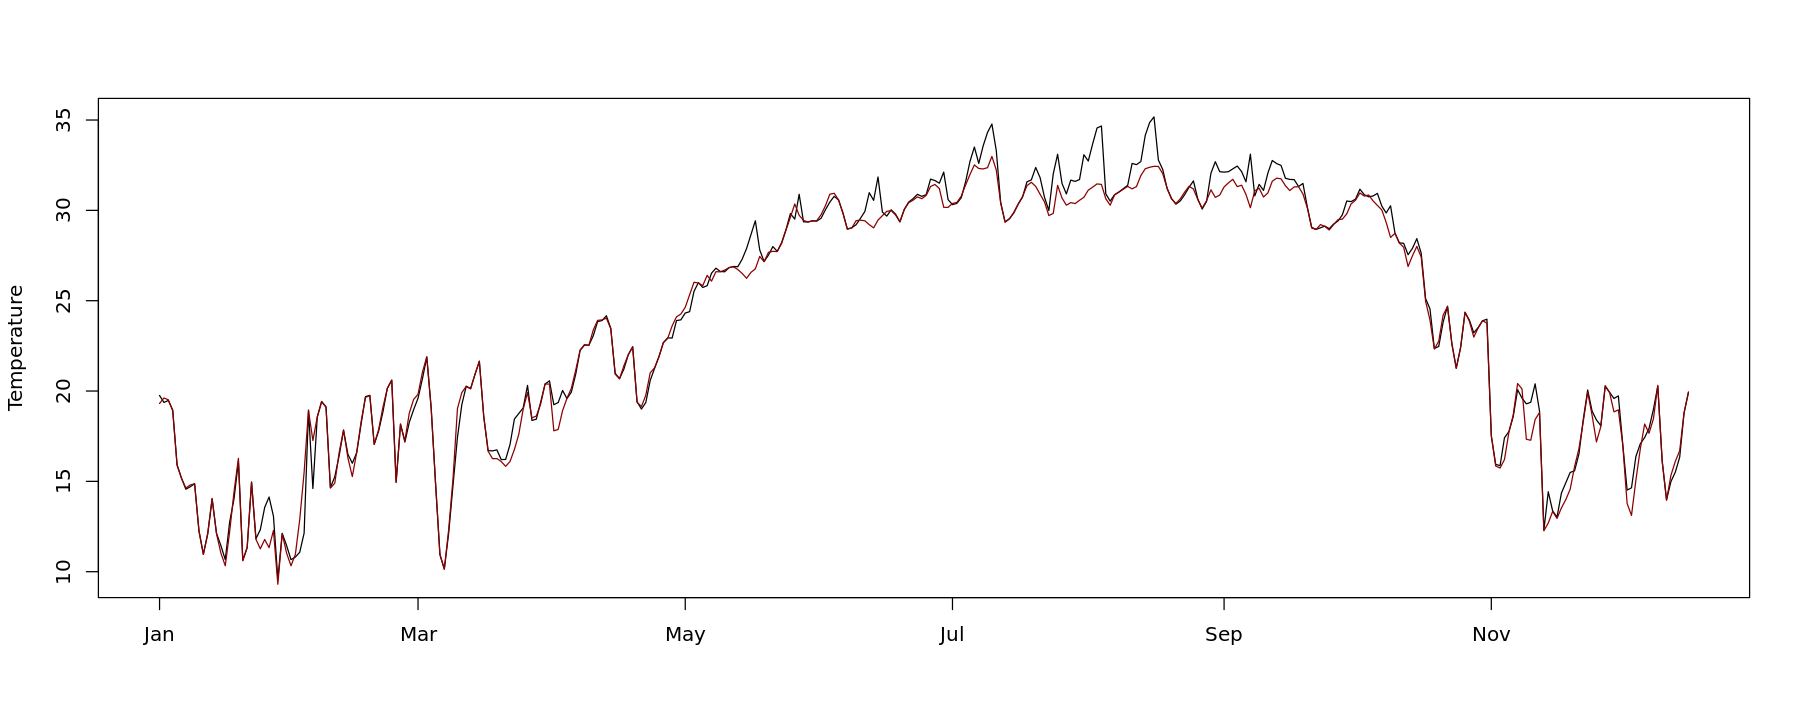

In [9]:
plot(df$Date,df$Tbot,type='l',ylab="Temperature",xlab='')
lines(df$Date,df$Tsurf,col='darkred')

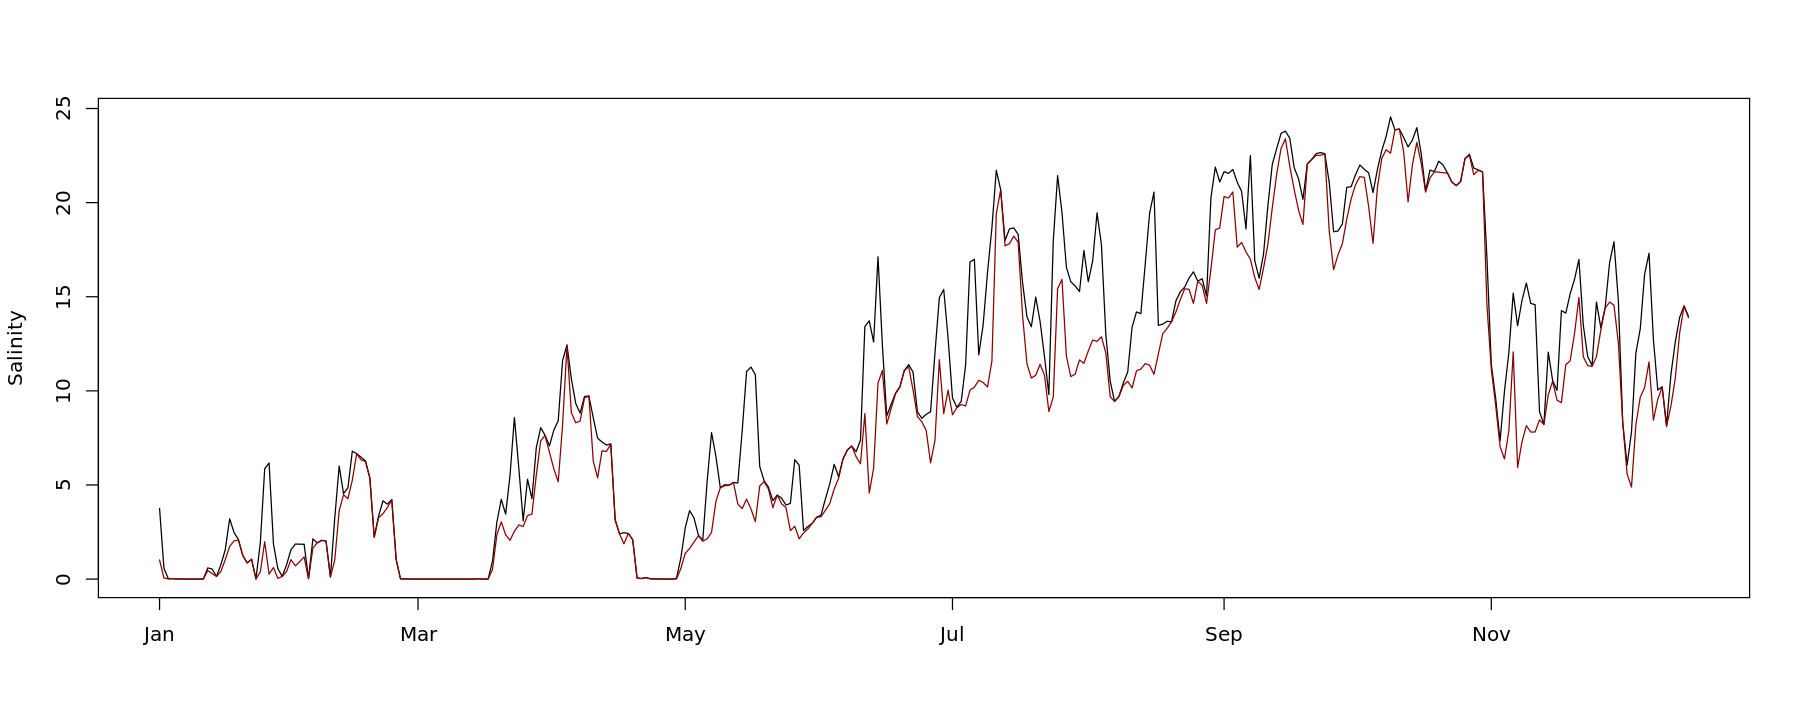

In [10]:
plot(df$Date,df$Sbot,type='l',ylab="Salinity",xlab='')
lines(df$Date,df$Ssurf,col='darkred')

## Project Data Lake on OSN

The modeling data is being hosted on Open Storage Network (OSN), through allocation EES210015 from the Advanced Cyberinfrastructure Coordination Ecosystem: Services & Support, which is supported by National Science Foundation grants #2138259, #2138286, #2138307, #2137603, and #2138296.

### Download a file
To download data using R in a Notebook:
- In the top nav bar to the left of the screen, click **File**
- Choose **New Launcher**
- At the bottom, click the box for **Terminal**

This opens a terminal where you can use basic Linux shell commands.  Use `wget` to download data from OSN.

The following file is model data extracted from the same location as station MS3C.  Copy and paste it into the terminal window.
```
wget https://renc.osn.xsede.org/ees210015-bucket01/hydrodynamics/ROMS_TS_csvFiles/MS3C.csv
```

To navigate back and forth between tabs:
- In the top nav bar, click **Tabs**
- Choose which Tab
- To navigate to the Notebok, you can also click **index.ipynb** in the left panel.

### Redo the steps with the new file.
The following assumes the new file is in the same directory as the Notebook.

In [ ]:
#Read profile data, assign to new dataframe
df2 <- read.csv('MS3C.csv')
#Clean up the date
df2$Date <- as.Date(df2$Date)
#Take a look
head(df2)

In [ ]:
plot(df$Date,df$Tbot,type='l',ylab="Bottom Temperatures",xlab='')
lines(df2$Date,df2$Tbot,col='darkgreen')

## Plot the difference in bottom temperature between the two stations

In [ ]:
df_diff = df$Tbot - df2$Tbot

In [ ]:
plot(df$Date,df_diff,type='l',ylab="Bottom Temperature, MB6H - MS3C",xlab='')